<a href="https://colab.research.google.com/github/GabeMaldonado/JupyterNotebooks/blob/master/ImprovingFashionMnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images / 255.0
test_images=test_images / 255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)

test_loss = model.evaluate(test_images, test_labels)

4423680/4422102 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4976 - accuracy: 0.8247
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3764 - accuracy: 0.8649
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3383 - accuracy: 0.8759
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3121 - accuracy: 0.8858
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.3436 - accuracy: 0.8777


We're getting an accuracy of ~87.7% -- not that great. We can improve by using **convolutions**. What convolutions do is basically they narrow down on the images content/features and focus on specific, distinct details. For instance, it one convolution can focus on horizontal features of the image whereas another one can focused on  vertical details.
Convolutions are applied by basically taking a 3x3 or 5x5 array and pass it over the image. By changing the underlying pixels based on the formula within that matrix, we can do things like edge detection. For instance, when using a 3x3 filter for edge detection where the middle cell is 8 and all of its neighbors are -1-- we would multiply each pixel value by 8 then subtract the value of each neighbor. Doing this for every pixel, we'll end up with an image that has it edges enhanced. This is perfect for computer vision because the most important features get highlighted and we will use thos eimportnat features to train the network. 
The convolutional layers get defined before the dense layers that way-- the information going into the dense layers is more focused and potentially more accurate. Let's add some conv layers to the DNN above:


In [2]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs=5)
test_loss = model.evaluate(test_images, test_labels)


2.3.0
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_3 (Dense)              (None, 10)         

We can see that the accuracy increased to ~93% on the training data and ~ 91% on the validation data. 
We can increase the number of epochs to, say, ~20 and we will see a improvement on the training data. However, the results on the validation data might go down. This is due to **overfitting** which basically means that the model has learned from the training data very well but it cannot generalize as good on unseen data. 

## How the convolutions were built:

The initial code gets, splits and preprocesses the data. 

Data is reshaped because the 1st convolution expects a single tensor containing everything, so instead of having 60,000 28x28x1 images ina list, we need to have a single 4D list of size 60,000x28x28x1 and teh same goes for the test images. Failure to process the data like this will result in an error when training the convolutions because it will not be able to recognize the shape. 

```
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
```

Now we need to define the model by passing the following parameters:

*  Nunber of convolutions we want to generate. This is arbitrary but it is good practice to start in the order of 32 (we used 64 above)
*  The size of the convolution -- 3x3 grid
*  The activation function to use -- we used  **Relu** which returns x when x>0 and 0 otherwise
*  In the first layer, the shape of the input data   

The convolutions is followed by a `MaxPooling` layer  which is designed to compress the image while maintaining the content of the features that were highlighted by the convolution. By specifying (2, 2) for the `MaxPooling` layer we want to quarter the size of the image. Simply put, the idea is to create a 2x2 array of pixels and pick the biggest one-- basically taking 4 and returning 1. This process gets repeated across the image so it reduces the number of horizontal and vertical pixels by half thus effectively reducing the image by 25%



```
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
```

Adding another convolution:

```
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2)
```


Now we can flatten the output and continue defining the rest of the DNN as we've seen before.

```
tf.keras.layers.Flatten()
tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
```

We can now compile the model, call the `fit` method to do the training and evaluate the loss and accuracy from teh test set:

```
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)
```





## Visualizing the Convolutions and Pooling

We can see the convolutions graphically. After running a convolution on the data we can start to see the emergence of features. When the DNN uses dthis features to learn, it works with a lot less data which makes training more efficiently. 

In [3]:
# print the first 100 labels

print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


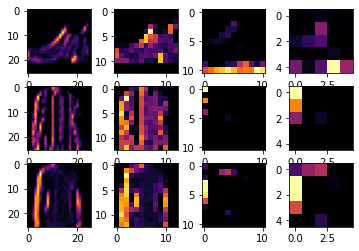

In [4]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)